In [1]:
%run __init__.py
from basic.scripts.cifar10.model_function import get_estimator_data
from basic.scripts.cifar10.utils import bytes_feature, int64_feature
from basic.scripts.cifar10.config import RunConfig
import tensorflow as tf

In [2]:
# The directory where the input data is stored
data_dir = '/home/jdavidagudelo/Documents/data_sets/minist/'
# The directory where the model will be stored
job_dir = '/home/jdavidagudelo/Documents/data_sets/minist/model/'
# Where to locate variable operations
variable_strategy = 'CPU'
# For usage with GPUs
num_gpus = 0
# Number of layers of the model
num_layers = 44
train_steps = 10000
train_batch_size = 128
eval_batch_size = 100
# Momentum for momentum optimizer
momentum = 0.9
# weight decay for convolution
weight_decay = 2e-4

learning_rate = 0.1
use_distortion_for_training = False
sync = False
num_intra_threads = 0
num_inter_threads = 0
data_format = None
log_device_placement = False
batch_norm_decay = 0.997
batch_norm_epsilon = 1e-5
kwargs = {
    'data_dir': data_dir,
    'job_dir': job_dir, 'variable_strategy': variable_strategy, 'num_gpus': num_gpus,
    'num_layers': num_layers, 'train_steps': train_steps, 'train_batch_size': train_batch_size,
    'eval_batch_size': eval_batch_size, 'momentum': momentum, 'weight_decay': weight_decay,
    'learning_rate': learning_rate, 'use_distortion_for_training': use_distortion_for_training,
    'sync': sync, 'num_intra_threads': num_intra_threads, 'num_inter_threads': num_inter_threads,
    'data_format': data_format, 'log_device_placement': log_device_placement, 
    'batch_norm_decay': batch_norm_decay, 'batch_norm_epsilon': batch_norm_epsilon
}
sess_config = tf.ConfigProto(
        allow_soft_placement=True,
        log_device_placement=log_device_placement,
        intra_op_parallelism_threads=num_intra_threads,
        gpu_options=tf.GPUOptions(force_gpu_compatible=True))

config = RunConfig(
        session_config=sess_config, model_dir=job_dir)
estimator_data = get_estimator_data(data_dir=data_dir, num_gpus=num_gpus, variable_strategy=variable_strategy, 
              run_config=config, use_distortion_for_training=False, hparams=kwargs, subset='train')

Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f08d5ebf518>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': gpu_options {
  force_gpu_compatible: true
}
allow_soft_placement: true
, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/home/jdavidagudelo/Documents/data_sets/minist/model/'}


DAMN


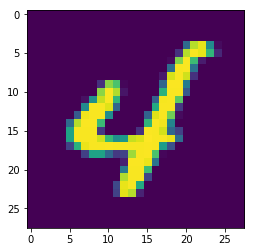

In [4]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('/home/jdavidagudelo/Documents/data_sets/minist/Images/train/15.png', flags=cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
print('DAMN')

In [3]:
estimator = estimator_data.get('classifier')

In [4]:
eval_input_fn = estimator_data.get('eval_input_fn')
eval_input_fn

functools.partial(<function input_fn at 0x7f089ce372f0>, '/home/jdavidagudelo/Documents/data_sets/minist/', subset='train', batch_size=100, num_shards=0)

In [14]:
estimator.evaluate(input_fn=eval_input_fn, steps=109)

{'image': <tf.Tensor 'ParseSingleExample/ParseSingleExample:0' shape=() dtype=string>, 'label': <tf.Tensor 'ParseSingleExample/ParseSingleExample:1' shape=() dtype=int64>}
Tensor("Cast_1:0", shape=(), dtype=int32, device=/device:CPU:0)
*************
INFO:tensorflow:Calling model_fn.
[<tf.Tensor 'IteratorGetNext:0' shape=(?, 28, 28, 1) dtype=float32>]
##########################################
[<tf.Tensor 'IteratorGetNext:1' shape=(?,) dtype=int32>]
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_1/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_2/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_3/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_4/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_5/: (?, 28, 28, 16)
INFO:tensorflow:image after unit 

{'accuracy': 0.89770645, 'loss': 0.46612656, 'global_step': 7237}

In [7]:
predictions = estimator.predict(img)
x = [p for p in predictions]

TypeError: unsupported callable

In [74]:
data_dir = '/home/jdavidagudelo/Documents/data_sets/minist/batches/'

In [ ]:
p = estimator.predict(input_fn=eval_input_fn)

In [9]:
import numpy as np
np.array(list(x for x in p))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_1/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_2/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_3/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_4/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_5/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage/residual_v1_6/: (?, 28, 28, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage_1/residual_v1/avg_pool/: (?, 14, 14, 16)
INFO:tensorflow:image after unit resnet/tower_0/stage_1/residual_v1/: (?, 14, 14, 32)
INFO:tensorflow:image after unit resnet/tower_0/stage_1/residual_v1_1/: (?, 14, 14, 32)
INFO:tensorflow:image after unit resnet/tower_0/stage_1/residual_v1_2/: (?, 14, 14, 32)
INFO:tens

KeyboardInterrupt: 